Importing modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, "**************" , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), '**************', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

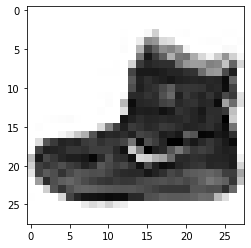

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

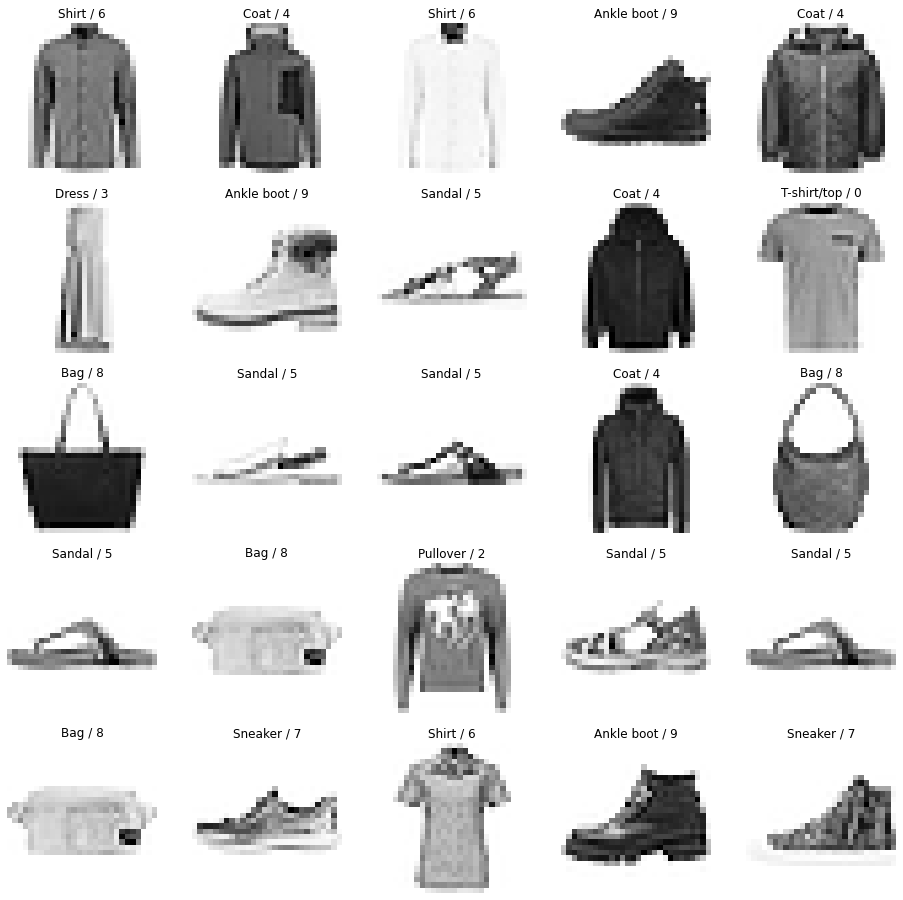

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 37s 382ms/step - loss: 0.6205 - accuracy: 0.7922 - val_loss: 0.4270 - val_accuracy: 0.8481
Epoch 2/10
94/94 [==============================] - 33s 349ms/step - loss: 0.3831 - accuracy: 0.8659 - val_loss: 0.3872 - val_accuracy: 0.8682
Epoch 3/10
94/94 [==============================] - 30s 315ms/step - loss: 0.3371 - accuracy: 0.8824 - val_loss: 0.3346 - val_accuracy: 0.8846
Epoch 4/10
94/94 [==============================] - 30s 316ms/step - loss: 0.3086 - accuracy: 0.8914 - val_loss: 0.3260 - val_accuracy: 0.8867
Epoch 5/10
94/94 [==============================] - 27s 292ms/step - loss: 0.2842 - accuracy: 0.8998 - val_loss: 0.3029 - val_accuracy: 0.8942
Epoch 6/10
94/94 [==============================] - 26s 277ms/step - loss: 0.2637 - accuracy: 0.9067 - val_loss: 0.2937 - val_accuracy: 0.8971
Epoch 7/10
94/94 [==============================] - 26s 279ms/step - loss: 0.2507 - accuracy: 0.9105 - val_loss: 0.2828 - val_accuracy: 0.9033

In [ ]:
y_pred = model.predict(x_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.01, ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, ..., 0.15, 0.16, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2767 - accuracy: 0.8995


[0.27668333053588867, 0.8995000123977661]

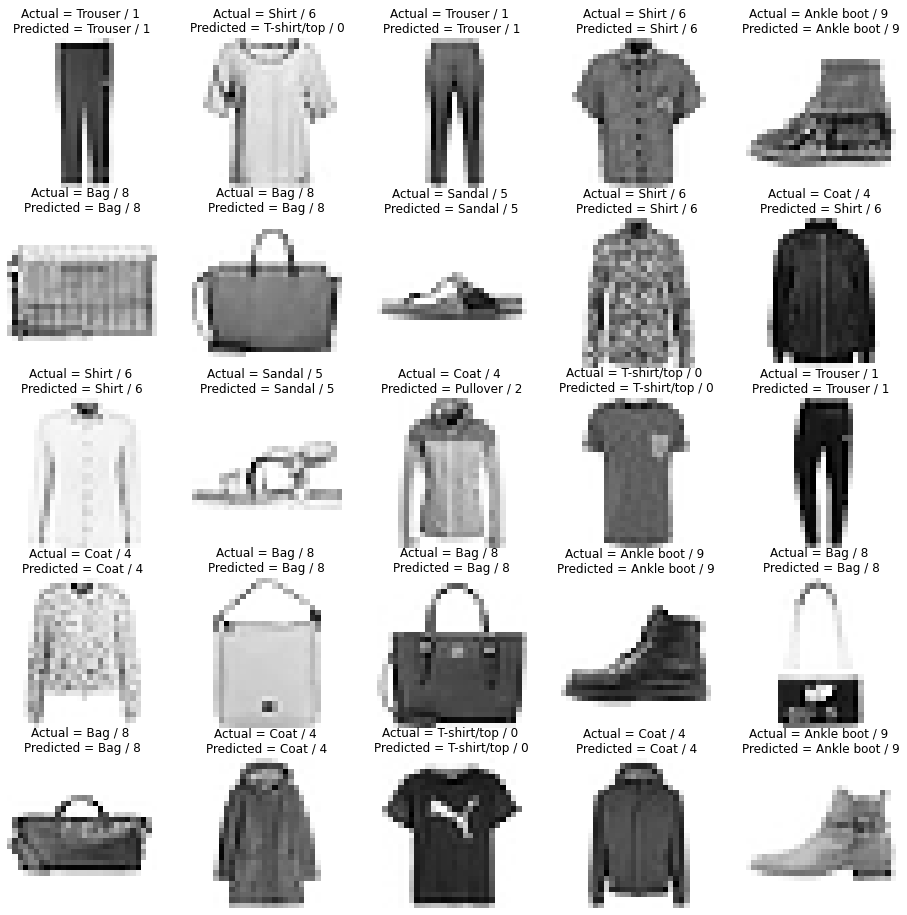

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

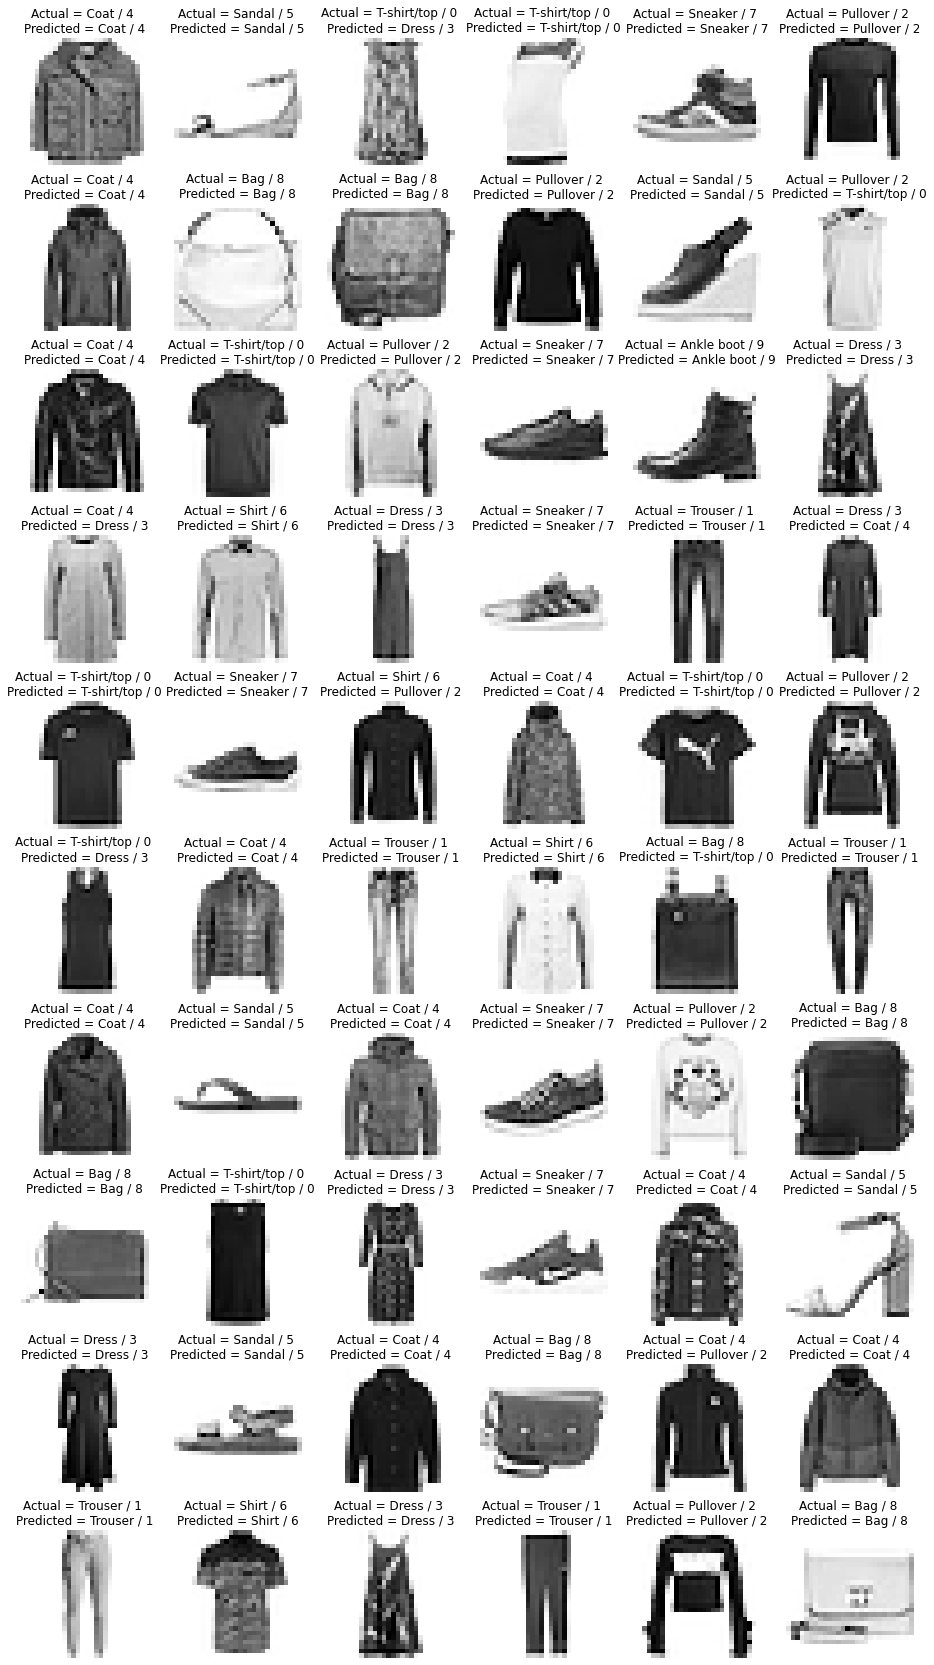

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.90      0.83      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.89      0.80      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



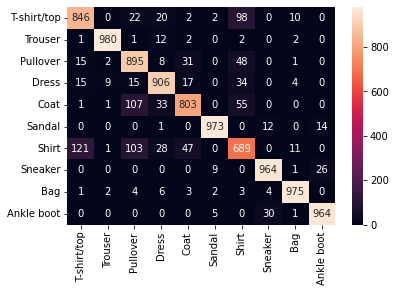

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

SAVING MODEL

In [ ]:
model.save('fashion_mnist_cnn_model.h5')